In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('ex5data1.mat')
X = mat['X'].flatten()
y = mat['y'].flatten()
Xtest = mat['Xtest'].flatten()
ytest = mat['ytest'].flatten()
Xval = mat['Xval'].flatten()
yval = mat['yval'].flatten()

In [137]:
def X_arr(X_val,poly):
    X_a = X_val**0
    for i in range(1,poly+1):
        X_a = np.c_[X_a,X_val**i]
    return X_a.T #shape polynomial+bias x banyak data

# Cost function equation

In [234]:
def J(theta_val,X_val,y_val,lambd=0):
    m = X_val.shape[0]
    poly = theta_val.flatten().shape[0] - 1
    X_a = X_arr(X_val,poly)
    z = (theta_val.reshape(1,-1) @ X_a).flatten()
    J1 = np.sum((z-y_val)**2)/(2*m)
    if lambd !=0:
        J2 = np.sum((theta_val.flatten()[1:])**2)*(lambd*0.5/m)
    return J1+J2

test = J(np.array([1,1]),X,y,1)
print(f'The value of cost function with theta of {[1,1]} is {test:.4f}, expected value of 303.993')

The value of cost function with theta of [1, 1] is 303.9932, expected value of 303.993


# Gradient cost function equation

In [228]:
def gradJ(theta_val,X_val,y_val,poly,lambd=0):
    m = X_val.shape[0]
    poly = theta_val.flatten().shape[0] - 1
    X_a = X_arr(X_val,poly)
    z = (theta_val.reshape(1,-1) @ X_a).flatten()
    dJ = np.sum((z-y_val)*X_a,axis=1)/m
    if lambd !=0:
        dJ[1:] += theta_val.flatten()[1:]*lambd/m
    return dJ
test = gradJ(np.array([1,1]),X,y,1,lambd=1)
print(f'The value of gradient is [{test[0]:.4f}, {test[1]:.4f}] expected value of [-15.30, 598.250]')

The value of gradient is [-15.3030, 598.2507] expected value of [-15.30, 598.250]


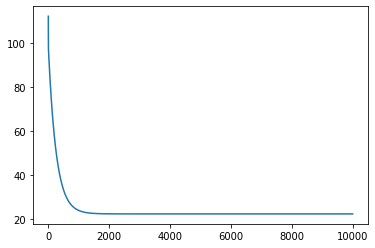

In [225]:
theta_init = np.random.rand(2)
rate = 2e-3
cost_list = []
for i in range(1,10000):
    descent_cost = gradJ(theta_init,X,y,1,0)
    theta_init -= rate * descent_cost
    cost_list.append(J(theta_init,X,y,1,0))
plt.plot(cost_list)

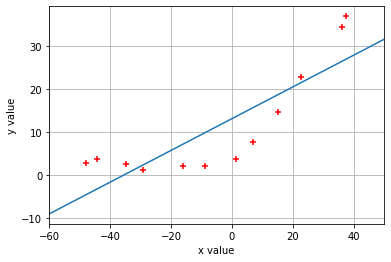

In [227]:
def plotscatter(theta_val):
    x_list = np.linspace(-60,50,100)
    X_a = X_arr(x_list,theta_val.flatten().shape[0]-1)
    z = (theta_val.reshape(1,-1) @ X_a).flatten()
    plt.plot(x_list,z)
    plt.scatter(X,y,marker='+',c='r')
    plt.xlabel('x value')
    plt.ylabel('y value')
    plt.grid()
    plt.xlim([-60,50])
plotscatter(theta_init)